# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 29

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,3.947368,15,17.783654,3.8,4.505192,NaN,4.810506,2.078090
12,Martínez,Aston Villa,54,27.818182,153,127.602176,5.5,4.587006,3.578210,4.573711,1.973933
560,Kelleher,Liverpool,45,2.000000,10,8.360213,5.0,4.180107,NaN,4.105341,1.970521
326,Dubravka,Newcastle Utd,48,4.047619,17,17.104194,4.2,4.225742,NaN,4.191935,1.928779
213,Meslier,Leeds United,47,27.777778,125,110.528790,4.5,3.979036,5.469530,3.829886,1.835393
597,Sánchez,Brighton,45,18.205128,71,70.255057,3.9,3.859081,4.178504,3.821839,1.819188
96,Pope,Burnley,55,27.826087,128,118.642125,4.6,4.263701,3.080186,4.391915,1.818048
548,Mendy,Chelsea,52,24.042553,113,98.317746,4.7,4.089322,5.360372,4.394636,1.793286
431,Fabianski,West Ham,50,26.829268,110,107.457317,4.1,4.005227,3.499432,4.157631,1.791192


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.914038,7.0,5.228510,NaN,5.177997,2.492594
13,Chambers,Arsenal,45,2.000000,7,9.299660,3.5,4.649830,NaN,4.929974,2.191951
273,Stones,Manchester City,53,17.941176,122,89.178786,6.8,4.970621,5.375082,4.959455,2.159100
277,Cancelo,Manchester City,61,23.018868,122,122.747499,5.3,5.332473,5.674704,5.334902,2.159055
75,Bernardo,Brighton,39,2.941176,5,11.803261,1.7,4.013109,NaN,3.974091,2.032117
123,James,Chelsea,50,22.894737,87,102.058527,3.8,4.457729,4.035147,4.771563,1.993557
104,Alonso,Chelsea,57,9.069767,39,41.886628,4.3,4.618269,7.744698,4.937769,1.934380
232,Chilwell,Chelsea,58,20.800000,104,93.072001,5.0,4.474615,4.137488,4.789307,1.857983
109,Rüdiger,Chelsea,47,13.061224,64,52.546050,4.9,4.023057,3.709647,4.330595,1.855698


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,61,22.903226,142,125.789216,6.2,5.492205,3.902553,5.556277,2.223729
301,Lingard,West Ham,62,7.000000,56,36.622330,8.0,5.231761,5.709984,5.070652,2.101126
105,Jorginho,Chelsea,47,20.222222,91,85.661436,4.5,4.236005,3.710984,4.333788,1.953923
302,Fernandes,Manchester Utd,115,29.027778,209,188.416604,7.2,6.490907,5.894438,6.448982,1.914064
37,Grealish,Aston Villa,75,21.864407,129,111.875243,5.9,5.116775,NaN,5.066223,1.868382
570,Raphinha,Leeds United,57,23.777778,107,105.382961,4.5,4.431994,5.167383,4.197618,1.856358
24,Saka,Arsenal,53,25.263158,96,107.683487,3.8,4.262471,3.231153,4.409217,1.851499
272,De Bruyne,Manchester City,119,23.148148,125,147.374077,5.4,6.366560,5.602553,6.455772,1.845574
390,Son,Tottenham,94,27.968750,179,153.509695,6.4,5.488615,5.438218,5.666344,1.790189


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,67,28.888889,156,146.080000,5.4,5.056615,3.917778,4.813596,1.953541
506,Wilson,Newcastle Utd,65,21.090909,116,103.720000,5.5,4.917759,NaN,4.822234,1.928904
388,Kane,Tottenham,116,26.901408,191,171.066667,7.1,6.359023,6.369984,6.496325,1.867073
224,Vardy,Leicester City,101,24.915254,147,145.920000,5.9,5.856653,5.496380,5.810641,1.842845
437,Antonio,West Ham,67,19.777778,89,92.833333,4.5,4.693820,5.382667,4.462046,1.813381
665,Maja,Fulham,55,8.064516,25,32.800000,3.1,4.067200,3.060000,3.726452,1.734260
514,Watkins,Aston Villa,66,27.906977,120,122.980000,4.3,4.406783,3.137832,4.360807,1.715338
164,Calvert-Lewin,Everton,76,25.185185,136,118.240000,5.4,4.694824,3.637286,4.584977,1.702991
68,Maupay,Brighton,62,26.944444,97,110.793333,3.6,4.111918,4.121991,4.107862,1.651386


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,115,29.027778,209,188.416604,7.2,6.490907,6.448982,1.914064
272,De Bruyne,Manchester City,119,23.148148,125,147.374077,5.4,6.366560,6.455772,1.845574
388,Kane,Tottenham,116,26.901408,191,171.066667,7.1,6.359023,6.496325,1.867073
224,Vardy,Leicester City,101,24.915254,147,145.920000,5.9,5.856653,5.810641,1.842845
254,Salah,Liverpool,124,28.064516,174,161.826446,6.2,5.766230,5.750064,1.637499
271,Gündogan,Manchester City,61,22.903226,142,125.789216,6.2,5.492205,5.556277,2.223729
390,Son,Tottenham,94,27.968750,179,153.509695,6.4,5.488615,5.666344,1.790189
277,Cancelo,Manchester City,61,23.018868,122,122.747499,5.3,5.332473,5.334902,2.159055
301,Lingard,West Ham,62,7.000000,56,36.622330,8.0,5.231761,5.070652,2.101126


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,7.0,5.228510,NaN,5.737713,5.177997,2.492594
271,Gündogan,Manchester City,61,22.903226,6.2,5.492205,3.902553,5.040848,5.556277,2.223729
13,Chambers,Arsenal,45,2.000000,3.5,4.649830,NaN,4.323949,4.929974,2.191951
273,Stones,Manchester City,53,17.941176,6.8,4.970621,5.375082,4.573241,4.959455,2.159100
277,Cancelo,Manchester City,61,23.018868,5.3,5.332473,5.674704,4.863527,5.334902,2.159055
301,Lingard,West Ham,62,7.000000,8.0,5.231761,5.709984,4.960965,5.070652,2.101126
112,Arrizabalaga,Chelsea,47,3.947368,3.8,4.505192,NaN,5.402187,4.810506,2.078090
75,Bernardo,Brighton,39,2.941176,1.7,4.013109,NaN,3.519891,3.974091,2.032117
123,James,Chelsea,50,22.894737,3.8,4.457729,4.035147,5.568007,4.771563,1.993557


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,3.947368,15,17.783654,3.8,4.505192,6.986341,4.810506,2.078090
568,Telles,Manchester Utd,53,7.096774,22,25.372254,3.1,3.575181,6.703519,3.512567,1.552959
302,Fernandes,Manchester Utd,115,29.027778,209,188.416604,7.2,6.490907,6.405126,6.448982,1.914064
104,Alonso,Chelsea,57,9.069767,39,41.886628,4.3,4.618269,6.339835,4.937769,1.934380
233,Iheanacho,Leicester City,57,16.176471,55,54.020000,3.4,3.339418,6.183333,3.317144,1.398728
239,Justin,Leicester City,49,22.954545,101,90.956010,4.4,3.962440,5.912491,4.149200,1.790048
102,Azpilicueta,Chelsea,58,19.019608,97,83.392352,5.1,4.384546,5.904087,4.697061,1.820584
245,Adrián,Liverpool,42,2.972973,11,10.508425,3.7,3.534652,5.730734,3.459886,1.724734
570,Raphinha,Leeds United,57,23.777778,107,105.382961,4.5,4.431994,5.600488,4.197618,1.856358


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,116,26.901408,191,171.066667,7.1,6.359023,6.251435,1.867073
302,Fernandes,Manchester Utd,115,29.027778,209,188.416604,7.2,6.490907,5.873036,1.914064
104,Alonso,Chelsea,57,9.069767,39,41.886628,4.3,4.618269,5.870372,1.934380
272,De Bruyne,Manchester City,119,23.148148,125,147.374077,5.4,6.366560,5.782848,1.845574
39,Hause,Aston Villa,44,4.000000,28,20.914038,7.0,5.228510,5.737713,2.492594
202,Bamford,Leeds United,67,28.888889,156,146.080000,5.4,5.056615,5.705651,1.953541
232,Chilwell,Chelsea,58,20.800000,104,93.072001,5.0,4.474615,5.606373,1.857983
123,James,Chelsea,50,22.894737,87,102.058527,3.8,4.457729,5.568007,1.993557
390,Son,Tottenham,94,27.968750,179,153.509695,6.4,5.488615,5.515767,1.790189


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,101,24.915254,5.9,5.856653,4.790236,1.842845,16.0,4.2,20.2,0.810748
388,Kane,Tottenham,116,26.901408,7.1,6.359023,6.251435,1.867073,14.9,6.3,21.2,0.788063
254,Salah,Liverpool,124,28.064516,6.2,5.766230,5.278024,1.637499,14.3,3.9,18.2,0.648506
202,Bamford,Leeds United,67,28.888889,5.4,5.056615,5.705651,1.953541,14.1,3.3,17.4,0.602308
302,Fernandes,Manchester Utd,115,29.027778,7.2,6.490907,5.873036,1.914064,12.8,9.7,22.5,0.775120
164,Calvert-Lewin,Everton,76,25.185185,5.4,4.694824,5.088084,1.702991,12.1,1.0,13.1,0.520147
514,Watkins,Aston Villa,66,27.906977,4.3,4.406783,4.562352,1.715338,12.1,2.9,15.0,0.537500
251,Mané,Liverpool,118,26.086957,4.6,5.199904,4.753924,1.513751,11.1,4.0,15.1,0.578833
68,Maupay,Brighton,62,26.944444,3.6,4.111918,3.784894,1.651386,10.7,3.1,13.8,0.512165


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,...,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week24,xG_week25,xG_week26,xG_week27,xG_week28,xG_week29,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
620,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
435,126.586057,4.40707,10,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,20,622,100.0,100.0,35.819391,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,1.030734,2.204777,2.297094,2.141341,4.239672,3.331484,2.441341,3.174192,4.426123,10.087068,NaN,8.071518,1.807586,6.780022,2.539465,4.297316,7.590127,9.194725,3.331484,3.726123,7.440687,3.204777,1.030734,6.186341,12.264926,5.095811,3.331484,1.661196,5.430734,5.495247,2


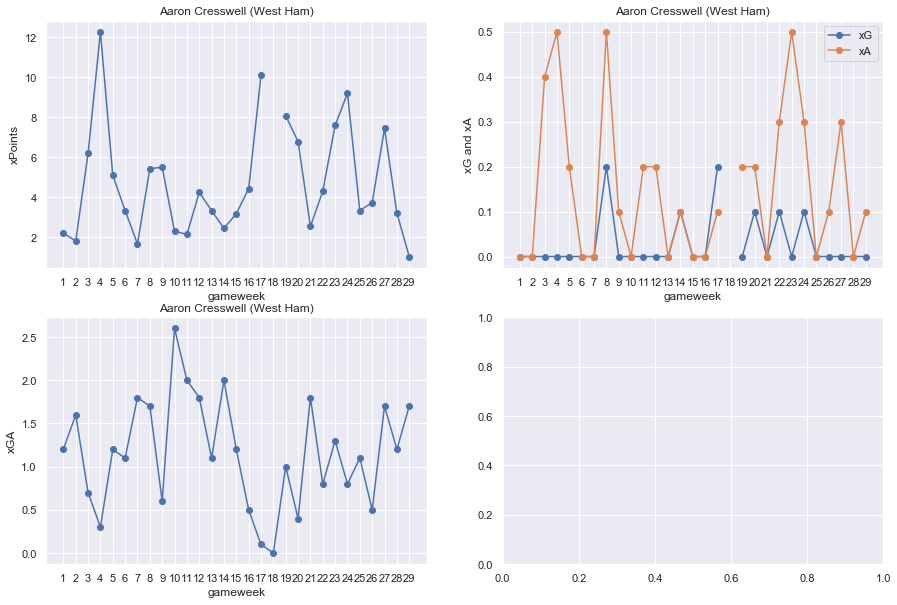

In [24]:
# find player index
name_string = 'Cress'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 435

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('De '),'web_name']

id
272    De Bruyne
Name: web_name, dtype: object

In [25]:
my_starting11 = [12,109,435,277,570,302,272,37,388,202,437] #vardy=224, grealish=37, mane=251
my_subs = [597,558,23,74]

In [26]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 63.35620743408393
Expected points next gameweek: 64.04805303075558


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,27.818182,5.5,4.587006,3.578210,4.720442,4.970279,4.573711,1.973933
109,Rüdiger,Chelsea,47,13.061224,4.9,4.023057,3.709647,4.564177,4.975733,4.330595,1.855698
435,Cresswell,West Ham,59,28.723404,4.7,4.407070,3.746761,4.913546,4.555116,4.493475,1.814362
277,Cancelo,Manchester City,61,23.018868,5.3,5.332473,5.674704,4.631299,4.863527,5.334902,2.159055
570,Raphinha,Leeds United,57,23.777778,4.5,4.431994,5.167383,5.600488,5.143240,4.197618,1.856358
302,Fernandes,Manchester Utd,115,29.027778,7.2,6.490907,5.894438,6.405126,5.873036,6.448982,1.914064
272,De Bruyne,Manchester City,119,23.148148,5.4,6.366560,5.602553,4.835461,5.782848,6.455772,1.845574
37,Grealish,Aston Villa,75,21.864407,5.9,5.116775,NaN,4.022978,5.372398,5.066223,1.868382
388,Kane,Tottenham,116,26.901408,7.1,6.359023,6.369984,5.579990,6.251435,6.496325,1.867073



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,18.205128,3.9,3.859081,4.178504,4.690492,3.509151,3.821839,1.819188
558,Coufal,West Ham,46,25.277778,3.6,3.827441,3.044770,3.605109,3.979604,3.916290,1.784554
23,Smith Rowe,Arsenal,42,13.939394,3.3,3.257168,1.674146,2.645525,3.168828,3.359064,1.589335
74,White,Brighton,45,27.931034,2.9,3.247849,4.098504,4.460492,2.873401,3.210304,1.531051


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)